In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import comb, ceil
%matplotlib inline 

In this exercise, we will be using data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) donated by the [MAGIC Gamma Telescope](https://www.mpp.mpg.de/en/research/magic-and-cta/magic) at the Max-Planck-Institut Für Physik. The goal is to build a binary classification neural network to classify the following data into signal (photons) and background (hadrons). The file contains 10 possible input variables. They are as follows:
1. **fLength**: major axis of ellipse (mm)
1. **fWidth**: minor axis of ellipse (mm)
1. **fSize**: 10-log of sum of content of all pixels (in #phot)
1. **fConc**: ratio of sum of two highest pixels over fSize (ratio)
1. **fConc1**: ratio of highest pixel over fSize (ratio)
1. **fAsym**: distance from highest pixel to center, projected onto major axis (mm)
1. **fM3Long**: 3rd root of third moment along major axis (mm)
1. **fM3Trans**: 3rd root of third moment along minor axis (mm)
1. **fAlpha**: angle of major axis with vector to origin (deg)
1. **fDist**: distance from origin to center of ellipse (mm)

In [2]:
data_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
names = ['fLength',   'fWidth',  'fSize', 'fConc','fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv(data_path, names=names, na_values='?')
df['id'] = np.where(df['class'] == 'g', 1, 0)
df = df.drop('class', axis=1)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,id
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [3]:
bkgd = df.loc[df['id'] == 0]
sgnl = df.loc[df['id'] == 1]
vrbl = df.drop(labels=['id'], axis=1).columns

In [4]:
df.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'id'],
      dtype='object')

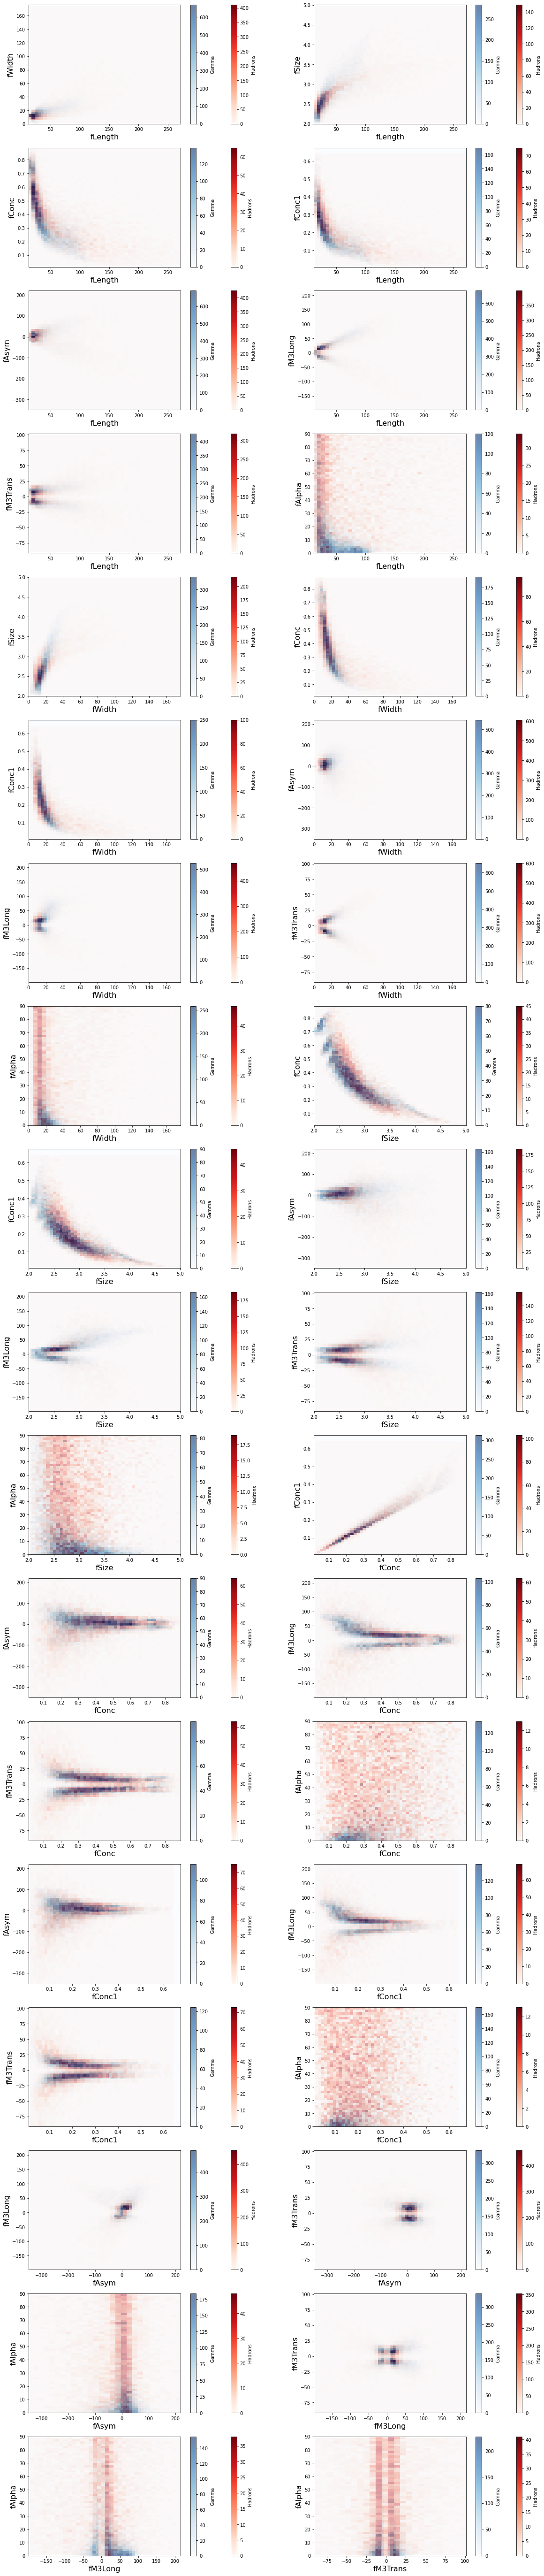

In [5]:
plt.rcParams['figure.figsize'] = [20, 100]

end = len(df.columns) - 1
index = 1
for i in range(0,end - 1):
    for j in range(0,end - 1):
        if (i != j) and (i < j):
            plt.subplot(ceil(comb(end - 1,2)/2),2,index)
            plt.hist2d(df.loc[df['id'] == 0][df.columns[i]], df.loc[df['id'] == 0][df.columns[j]], bins=50, cmap='Reds', alpha=1)
            plt.colorbar(label='Hadrons')
            plt.hist2d(df.loc[df['id'] == 1][df.columns[i]], df.loc[df['id'] == 1][df.columns[j]], bins=50, cmap='Blues', alpha=0.6)
            plt.colorbar(label='Gamma')
            plt.xlabel(df.columns[i], fontsize=16)
            plt.ylabel(df.columns[j], fontsize=16)
            index += 1
plt.show()